In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [23]:
credit_data = pd.read_csv(r"C:\Users\Admin\Downloads\german_credit_data.csv")

In [24]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [25]:
df=credit_data.copy()

In [26]:
df=df.drop('Unnamed: 0',axis=1)

In [27]:
df['Checking account'] =df['Checking account'].map({"little":0,"moderate":1,"rich":2 });
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].dropna().median())
df['Saving accounts']=df['Saving accounts'].map({"little":0,"moderate":1,"rich":2 ,"quite rich":3});
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].dropna().median())
df['Risk']=df['Risk'].map({"good":1,"bad":0});

In [28]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0.0,0.0,1169,6,radio/TV,1
1,22,female,2,own,0.0,1.0,5951,48,radio/TV,0
2,49,male,1,own,0.0,1.0,2096,12,education,1
3,45,male,2,free,0.0,0.0,7882,42,furniture/equipment,1
4,53,male,2,free,0.0,0.0,4870,24,car,0


In [29]:
discrete_columns = ['Sex','Housing','Purpose']
continuous_columns = ['Age','Job','Saving accounts', 'Checking account','Credit amount', 'Duration']

In [30]:
dummy_sex = pd.get_dummies(df['Sex'],prefix='sex',drop_first=True)
dummy_house = pd.get_dummies(df['Housing'],prefix='house',drop_first=True)
dummy_purpose = pd.get_dummies(df['Purpose'],prefix='purpose',drop_first=True)

In [31]:
credit_continuous = df[continuous_columns]

In [32]:
credit_data_new = pd.concat([dummy_sex,dummy_house,dummy_purpose,credit_continuous,df['Risk']],axis=1)

In [33]:
credit_data_new.head()

,sex_male,house_own,house_rent,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
0,1,1,0,0,0,0,0,1,0,0,67,2,0.0,0.0,1169,6,1
1,0,1,0,0,0,0,0,1,0,0,22,2,0.0,1.0,5951,48,0
2,1,1,0,0,0,1,0,0,0,0,49,1,0.0,1.0,2096,12,1
3,1,0,0,0,0,0,1,0,0,0,45,2,0.0,0.0,7882,42,1
4,1,0,0,1,0,0,0,0,0,0,53,2,0.0,0.0,4870,24,0


In [34]:
x_train,x_test,y_train,y_test = train_test_split( credit_data_new.drop(['Risk'],axis=1),
                                                 credit_data_new['Risk'],train_size =0.7,random_state=42)

The random forest ML model is applied with assumed hyperparameter values, as follows:
- Number of trees is 1000
- Criterion of slitting is gini
- Maximum depth each decision tree can grow is 100
- Minimum observations required at each not to be eligible for splitting is 3
- Minimum number of observations in tree node should be 2

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_fit = RandomForestClassifier( n_estimators=1000, 
                                criterion="gini",
                                max_depth=100, 
                                min_samples_split=3,
                                min_samples_leaf=2)
rf_fit.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
print ("\nRandom Forest -Train Confusion Matrix\n\n",
       pd.crosstab(y_train, 
                   rf_fit.predict( x_train),
                   rownames =["Actuall"],
                   colnames = ["Predicted"]))
print ("\n Random Forest - Train accuracy",
       round(accuracy_score(y_train, rf_fit.predict(x_train)),3))


Random Forest -Train Confusion Matrix

 Predicted    0    1
Actuall            
0          157   52
1            2  489

 Random Forest - Train accuracy 0.923


In [37]:
print ("\nRandom Forest - Test ConfusionMatrix\n\n",
       pd.crosstab(y_test, rf_fit.predict(x_test),rownames =["Actuall"],colnames = ["Predicted"]))
print ("\nRandom Forest - Test accuracy",
       round(accuracy_score(y_test,rf_fit.predict(x_test)),3))


Random Forest - Test ConfusionMatrix

 Predicted   0    1
Actuall           
0          22   69
1          13  196

Random Forest - Test accuracy 0.727


From observing the above results, the test accuracy produced from random forest is  0.727,
which is much higher than the test accuracy of 0.68 from logistic regression results, even
after the careful tuning and removing insignificant and multi-collinear variables. This entire
phenomenon boils down to the core theme of bias versus variance trade-off. Linear models
are very robust and do not have enough variance to fit non-linearity in data, however, with
ensemble techniques, we can minimize the variance error from a conventional decision tree,
which produces the result with minimum errors from both bias and variance components.The accuracy of the random forest can be further optimized by using the grid search
method to obtain the optimum hyperparameters, for which accuracy could be much higher
than the randomly chosen hyperparameters. In the next section, we will be covering the
grid search method in detail

# Grid search on random forest
Grid search has been performed by changing various hyperparameters with the following
settings. However, readers are encouraged to try other parameters to explore further in this
space.
- Number of trees is (1000,2000,3000)
- Maximum depth is (100,200,300)
- Minimum samples per split are (2,3)
- Minimum samples in leaf node are (1,2)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

The Pipeline function creates the combinations which will be applied one by one
sequentially to determine the best possible combination

In [39]:
pipeline = Pipeline([('clf',RandomForestClassifier(criterion='gini'))])
parameters = {'clf__n_estimators':(1000,2000,3000),
              'clf__max_depth':(100,200,300),
              'clf__min_samples_split':(2,3),
              'clf__min_samples_leaf':(1,2) }

# In the following, grid search utilizes cross-validation of five to ensure robustness in the model, which is the ML way of creating two-point validation of the model:

In [40]:
grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1, cv=5,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                              

In [41]:
print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

Best Training score: 0.726
Best parameters set:
	clf__max_depth: 100
	clf__min_samples_leaf: 2
	clf__min_samples_split: 3
	clf__n_estimators: 1000


In [42]:
predictions = grid_search.predict(x_test)

In [43]:
print ("Testing accuracy:",round(accuracy_score(y_test,predictions),4))
print ("\nComplete report of Testingdata\n",classification_report(y_test,predictions))

Testing accuracy: 0.7233

Complete report of Testingdata
               precision    recall  f1-score   support

           0       0.61      0.25      0.36        91
           1       0.74      0.93      0.82       209

    accuracy                           0.72       300
   macro avg       0.67      0.59      0.59       300
weighted avg       0.70      0.72      0.68       300



In [44]:
print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n", 
       pd.crosstab(y_test, predictions,rownames = ["Actuall"],colnames=["Predicted"]))



Random Forest Grid Search- Test Confusion Matrix

 Predicted   0    1
Actuall           
0          23   68
1          15  194


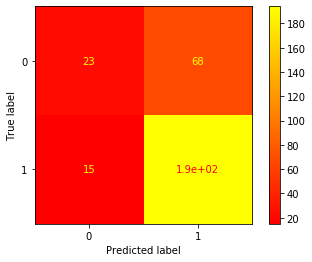

In [47]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
class_names=np.unique(credit_data_new['Risk'])
class_names
plot_confusion_matrix(grid_search,x_test,y_test,
                     display_labels=class_names,
                     cmap=plt.cm.autumn);

By predicting
10 percent better accuracy, losses incurred due to sanctioning loans to bad customers will be
greatly decreased.